In [1]:
from astropy.table import Table,QTable

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')

from mass_ratio_plottingFunctions import DM_SM_hist, DM_SM_hist_std, median_hist

import numpy as np

import matplotlib.pyplot as plt

In [2]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images/'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/images/'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
#wrong_master_table = QTable.read('../spirals/WRONG-master_file_vflag_10_smooth2-27.txt', format='ascii.ecsv')
#master_table = QTable.read('../spirals/Pipe3D-master_file_vflag_10_smooth2-27.txt', format='ascii.ecsv')
master_table = Table.read('../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

#### Remove bad galaxies

In [3]:
'''
bad_boolean_wrong = np.logical_or(wrong_master_table['curve_used'] == 'non', 
                                  wrong_master_table['curve_used'] == 'none')
bad_boolean = np.logical_or(master_table['curve_used'] == 'non', 
                            master_table['curve_used'] == 'none')
'''
bad_boolean = master_table['curve_used'] == -99

#wrong_good_galaxies = wrong_master_table[np.logical_not(bad_boolean_wrong)]
#wrong_bad_galaxies = wrong_master_table[bad_boolean_wrong]
good_galaxies = master_table[np.logical_not(bad_boolean)]

#### Split galaxies into "walls" and "voids"

In [4]:
#vboolean_wrong = wrong_good_galaxies['vflag'].data == 1
#wboolean_wrong = wrong_good_galaxies['vflag'].data == 0
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

#wrong_void_table = wrong_good_galaxies[vboolean_wrong]
#wrong_wall_table = wrong_good_galaxies[wboolean_wrong]
void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]

### Histogram parameters

In [5]:
#OLD_hist_range = (0, 200)
#OLD_bins = np.linspace( OLD_hist_range[0], OLD_hist_range[1], 20)

hist_range = (0, 50)
bins = np.arange( hist_range[0], hist_range[1], 2.5)
#bins = np.linspace( hist_range[0], hist_range[1], 20)

### Initialize table to store the number of galaxies in each bin of the histogram(s)

In [6]:
#wrong_count_table = Table()
count_table = Table()

# First column is the bins
#wrong_count_table['Bins'] = OLD_bins[1:]
count_table['Bins'] = bins[1:]

## Function to calculate shift between populations

In [7]:
def calculate_shift(void_ratios, wall_ratios, void_ratio_errors, wall_ratio_errors):
    '''
    Calculate the average shift between the void and wall populations.
    
    
    Parameters:
    ===========
    
    void_ratios : numpy array of shape (n_void,)
        Array of the mass ratios for the void galaxies
        
    wall_ratios : numpy array of shape (n_wall,)
        Array of the mass ratios for the wall galaxies
        
    void_ratio_errors : numpy array of shape (n_void,)
        Array of the errors in the mass ratios for the void galaxies
        
    wall_ratio_errors : numpy array of shape (n_wall,)
        Array of the errors in the mass ratios for the wall galaxies
    '''
    #######################################################################
    # Calculate averages, shift between voids and walls
    #----------------------------------------------------------------------
    v_mean = np.mean(void_ratios)
    w_mean = np.mean(wall_ratios)

    v_median = np.median(void_ratios)
    w_median = np.median(wall_ratios)

    mean_diff = v_mean - w_mean
    median_diff = v_median - w_median
    #######################################################################


    #######################################################################
    # Calculate uncertainties in the averages and shifts
    #----------------------------------------------------------------------
    # Preserve only finite elements for error calculation
    v_finite = void_ratio_errors[np.isfinite(void_ratio_errors)]
    w_finite = wall_ratio_errors[np.isfinite(wall_ratio_errors)]

    v_mean_err = np.sqrt(np.sum(v_finite**2))/len(v_finite)
    w_mean_err = np.sqrt(np.sum(w_finite**2))/len(w_finite)

    mean_diff_err = np.sqrt(v_mean_err**2 + w_mean_err**2)
    #######################################################################


    print('There are', len(void_ratios), 'void galaxies and', len(wall_ratios), 'wall galaxies in this sample.')
    print('The average ratio for voids is', v_mean, 'pm', v_mean_err, 'and for walls is', w_mean, 'pm', w_mean_err)
    print('The average difference between the two populations is', mean_diff, 'pm', mean_diff_err)
    print('The median ratio for voids is', v_median, 'and for walls is', w_median)
    print('The median difference between the two populations is', median_diff)

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

There are 638 void galaxies and 931 wall galaxies in this sample.
The average ratio for voids is 10870064.076470919 pm 20033304454443.37 and for walls is 5445079.794637038 pm 7722347133.200563
The average difference between the two populations is 5424984.281833881 pm 20033305942830.95
The median ratio for voids is 1.2383226520698776 and for walls is 1.075980607414398
The median difference between the two populations is 0.16234204465547952


<IPython.core.display.Javascript object>


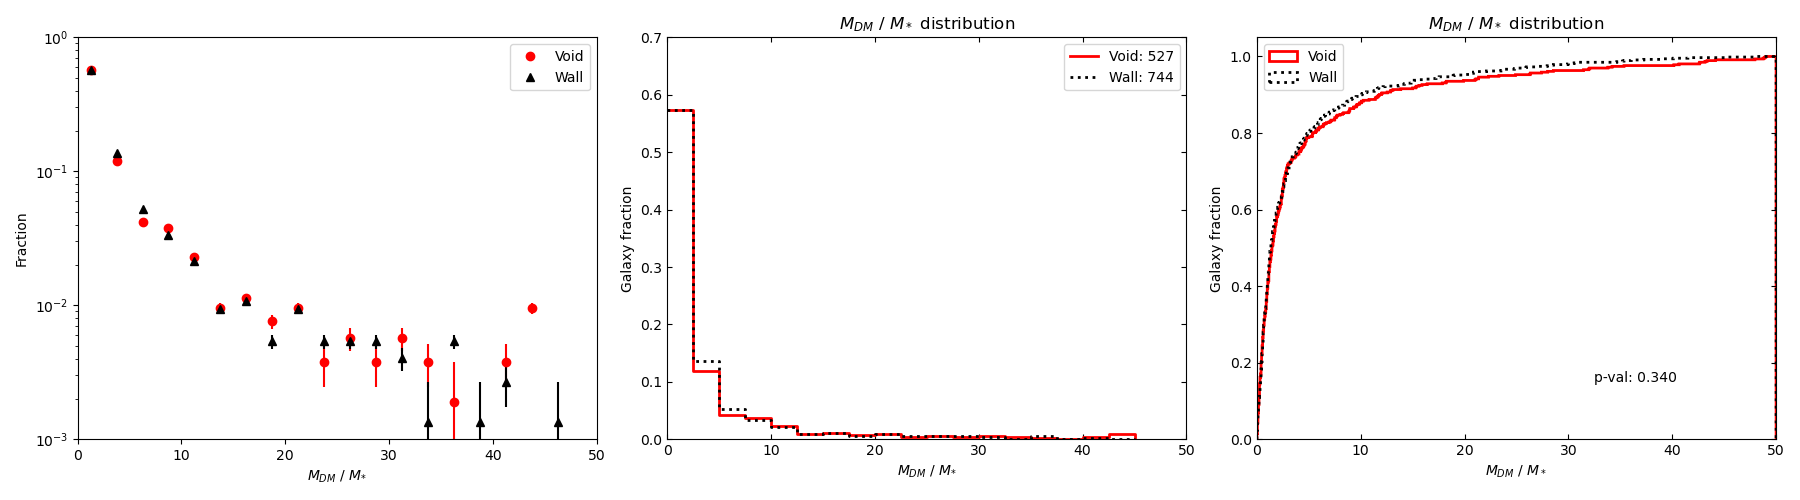

In [8]:
#print('Wrong mass ratios')
#calculate_shift(wrong_void_table['Mdark_Mstar_ratio'], wrong_wall_table['Mdark_Mstar_ratio'],
#                wrong_void_table['Mdark_Mstar_ratio_error'], wrong_wall_table['Mdark_Mstar_ratio_error'])

#print('\nCorrect mass ratios')
calculate_shift(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], 
                void_table['Mdark_Mstar_ratio_error'], wall_table['Mdark_Mstar_ratio_error'])

%matplotlib notebook

#DM_SM_hist(wrong_void_table['Mdark_Mstar_ratio'], wrong_wall_table['Mdark_Mstar_ratio'], OLD_bins, 
#           OLD_hist_range, y_max=0.7)
DM_SM_hist(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], bins, hist_range, 
           y_max=0.7)#, save_fig=True, FILE_SUFFIX='_all', IMAGE_DIR=IMAGE_DIR)

# Bin by absolute magnitude

In [9]:
def mag_bin_results(ctable, vtable, wtable, Mmin, Mmax, bin_array, bin_range):
    
    vboolean = np.logical_and(vtable['rabsmag'].data < Mmin, 
                              vtable['rabsmag'].data >= Mmax)
    wboolean = np.logical_and(wtable['rabsmag'].data < Mmin, 
                              wtable['rabsmag'].data >= Mmax)
    
    
    #######################################################################
    # Separate the mass ratios according to wall or void.
    #----------------------------------------------------------------------
    wall_ratio = wtable['Mdark_Mstar_ratio'][wboolean].data
    void_ratio = vtable['Mdark_Mstar_ratio'][vboolean].data

    wall_ratio_err = wtable['Mdark_Mstar_ratio_error'][wboolean].data
    void_ratio_err = vtable['Mdark_Mstar_ratio_error'][vboolean].data

    #Mrange_wall_table = wtable[wboolean]
    #Mrange_void_table = vtable[vboolean]
    #######################################################################
    
    
    #######################################################################
    # Add population counts to histogram table
    #----------------------------------------------------------------------
    ctable['v'+str(Mmin)+str(Mmax)], _ = np.histogram(void_ratio, bin_array)
    ctable['w'+str(Mmin)+str(Mmax)], _ = np.histogram(wall_ratio, bin_array)
    #######################################################################
    
    
    calculate_shift(void_ratio, wall_ratio, void_ratio_err, wall_ratio_err)

    DM_SM_hist(void_ratio, wall_ratio, bin_array, bin_range, y_max=0.7, 
               plot_title=str(Mmin) + ' $> M_r >$ ' + str(Mmax))
               #save_fig=True, FILE_SUFFIX='_17-18', IMAGE_DIR=IMAGE_DIR)

### Dwarf galaxies ($M_r > -17$)

There are 4 void galaxies and 1 wall galaxies in this sample.
The average ratio for voids is 308100233.0676559 pm 281948673638.85675 and for walls is -0.24552468644767206 pm 534559934.1993765
The average difference between the two populations is 308100233.3131806 pm 281949180387.2354
The median ratio for voids is 10.121375526475248 and for walls is -0.24552468644767206
The median difference between the two populations is 10.36690021292292


<IPython.core.display.Javascript object>


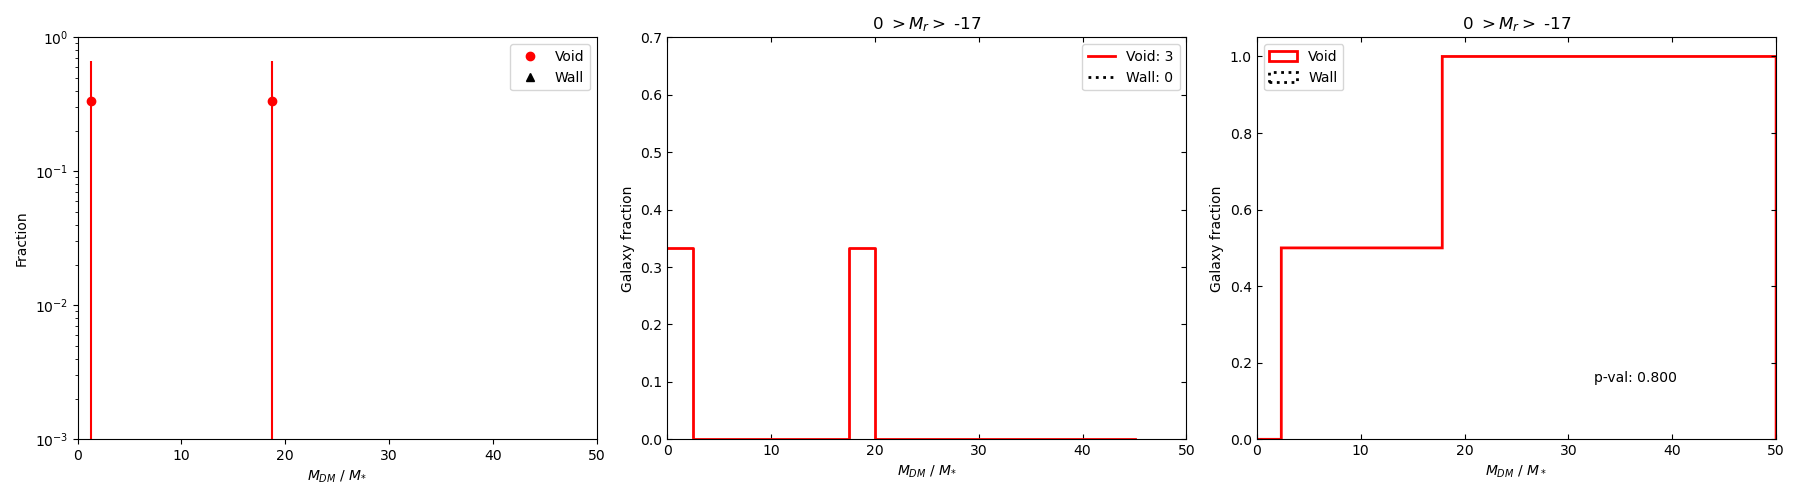

/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/mass_ratio_plottingFunctions.py:476: RuntimeWarning: invalid value encountered in true_divide
  nw = Nw/Ntot_wall
/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/mass_ratio_plottingFunctions.py:496: RuntimeWarning: invalid value encountered in multiply
  ax1.errorbar(bins[:-1] + 0.5*bin_step, nw, yerr=1/(Ntot_wall*np.sqrt(Nw)),
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [10]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                0, -17, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, 0, -17, bins, hist_range)

### Galaxies between -17 and -18 in $M_r$

There are 77 void galaxies and 78 wall galaxies in this sample.
The average ratio for voids is 5.894754185432756 pm 51066024.079892136 and for walls is 8.341778464371838 pm 1157001763.3731134
The average difference between the two populations is -2.4470242789390824 pm 1158128153.212684
The median ratio for voids is 2.7948386932085416 and for walls is 2.3979276343883766
The median difference between the two populations is 0.396911058820165


<IPython.core.display.Javascript object>


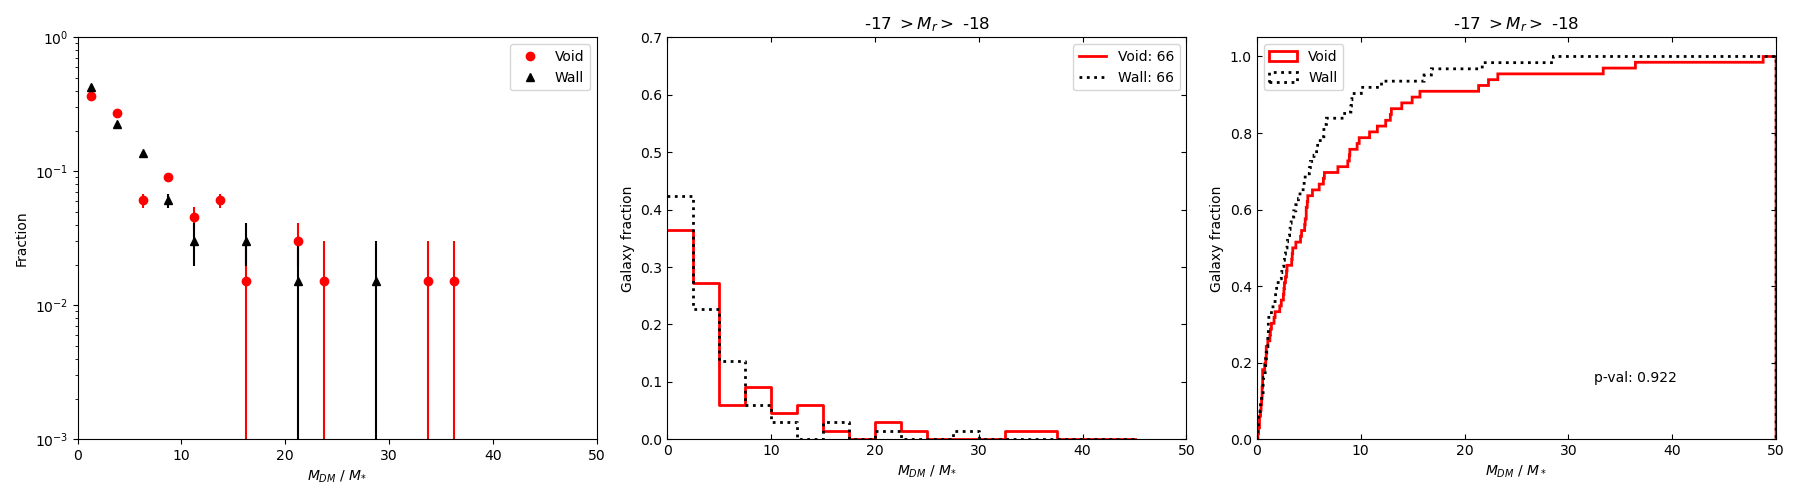

In [12]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -17, -18, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -17, -18, bins, hist_range)

### Galaxies fainter than -18 in $M_r$

There are 81 void galaxies and 79 wall galaxies in this sample.
The average ratio for voids is 5.915013796295818 pm 48549993.13018354 and for walls is 8.22880722249432 pm 1142356332.3440833
The average difference between the two populations is -2.313793426198502 pm 1143387551.0427628
The median ratio for voids is 2.6927523048310467 and for walls is 2.353917277603478
The median difference between the two populations is 0.33883502722756864


<IPython.core.display.Javascript object>


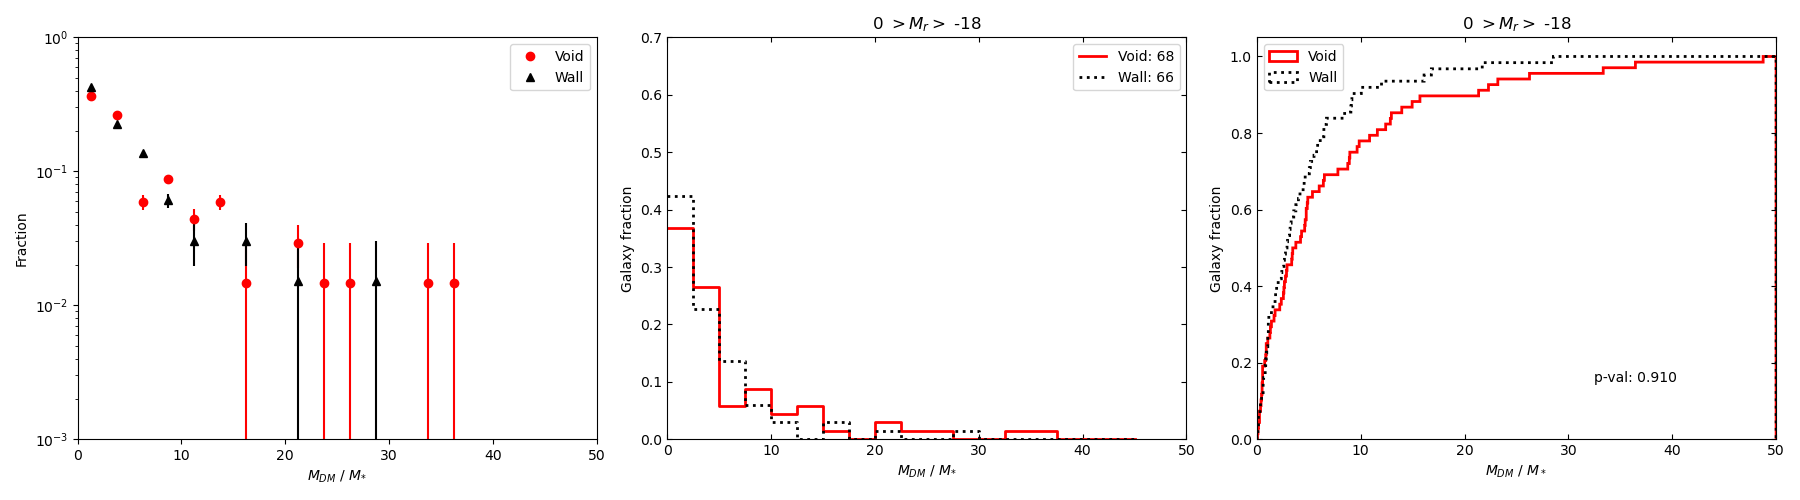

In [13]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                0, -18, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, 0, -18, bins, hist_range)

### Galaxies between -18 and -19 in $M_r$

There are 167 void galaxies and 215 wall galaxies in this sample.
The average ratio for voids is 5.738790793245338 pm 4777911.41422781 and for walls is 11.006830041661253 pm 21783703.438206997
The average difference between the two populations is -5.268039248415915 pm 22301528.4894547
The median ratio for voids is 2.310304288143196 and for walls is 1.8500442867785356
The median difference between the two populations is 0.4602600013646603


<IPython.core.display.Javascript object>


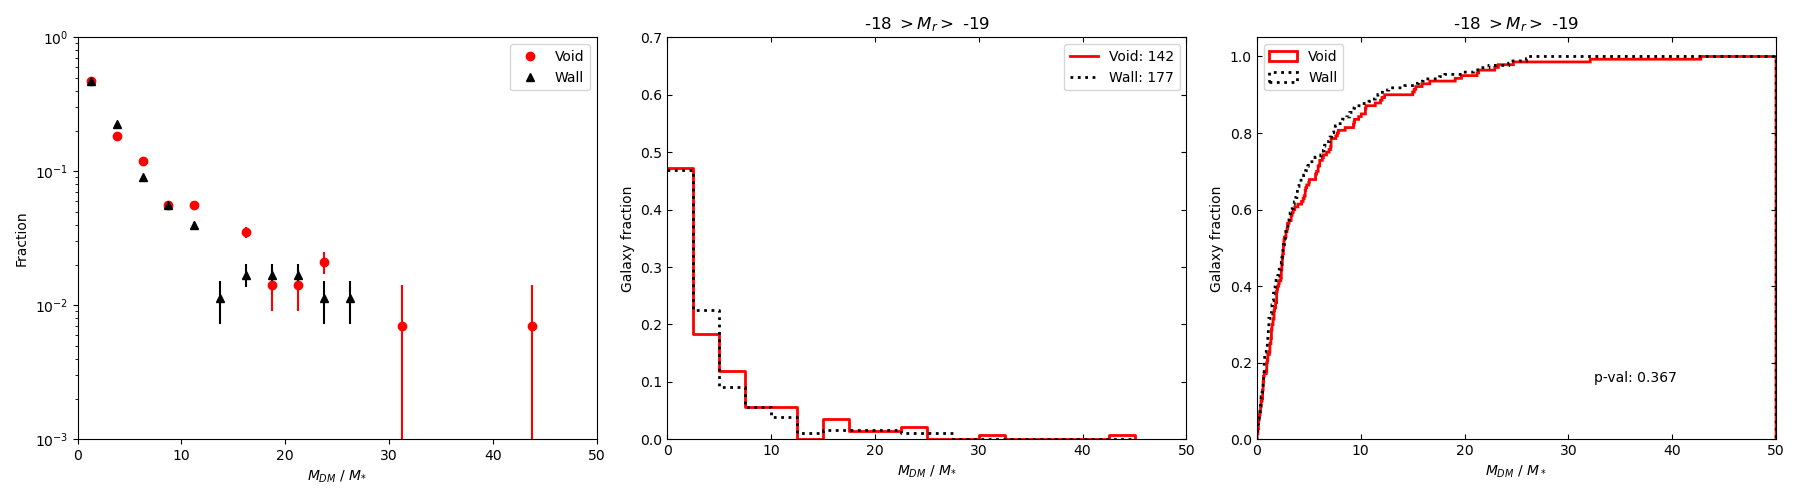

In [15]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -18, -19, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -18, -19, bins, hist_range)

### Galaxies between -19 and -20 in $M_r$

There are 166 void galaxies and 243 wall galaxies in this sample.
The average ratio for voids is 34.554191602653695 pm 1034904.0627143529 and for walls is 2.1116040212390037 pm 6776634.336962846
The average difference between the two populations is 32.44258758141469 pm 6855202.3570370665
The median ratio for voids is 0.9974853304242426 and for walls is 0.862989424387467
The median difference between the two populations is 0.13449590603677564


<IPython.core.display.Javascript object>


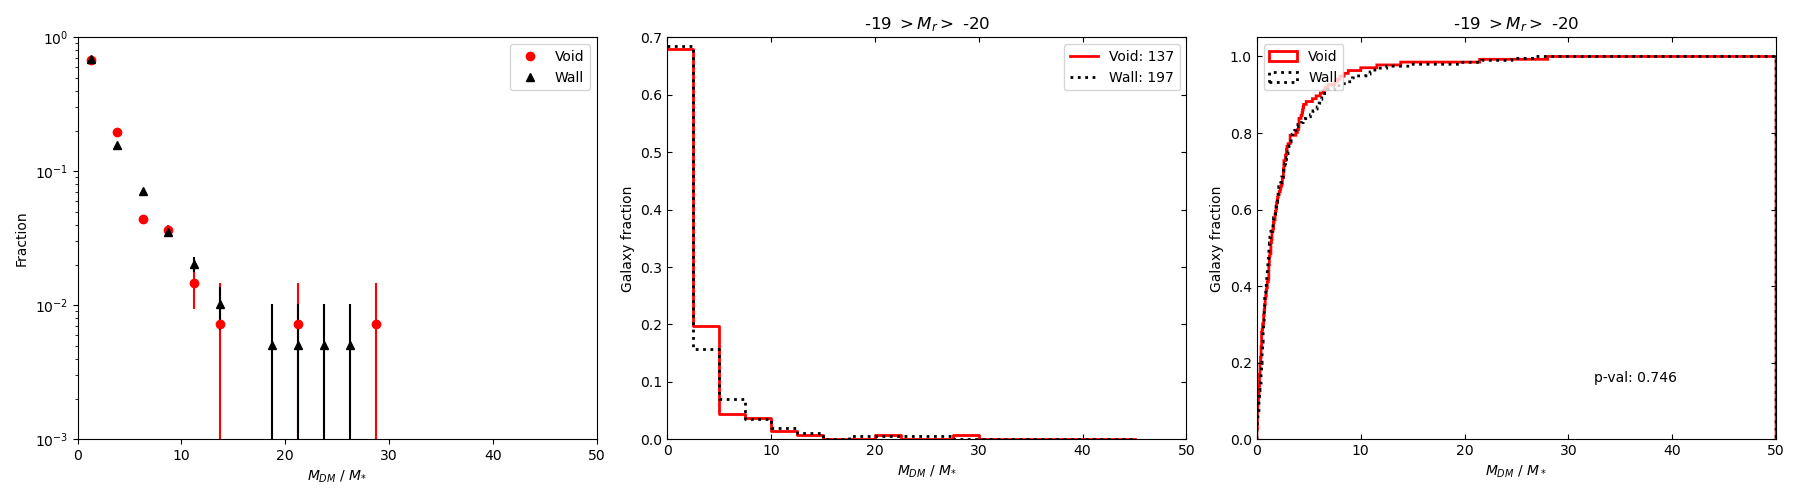

In [16]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -19, -20, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -19, -20, bins, hist_range)

### Galaxies with $M_r < -20$

There are 228 void galaxies and 401 wall galaxies in this sample.
The average ratio for voids is 1.870403262580128 pm 881071.2709923586 and for walls is 1.1355078127550606 pm 8046559.774940333
The average difference between the two populations is 0.7348954498250673 pm 8094653.22273017
The median ratio for voids is 0.5168026517990802 and for walls is 0.5857720224124608
The median difference between the two populations is -0.0689693706133806


<IPython.core.display.Javascript object>


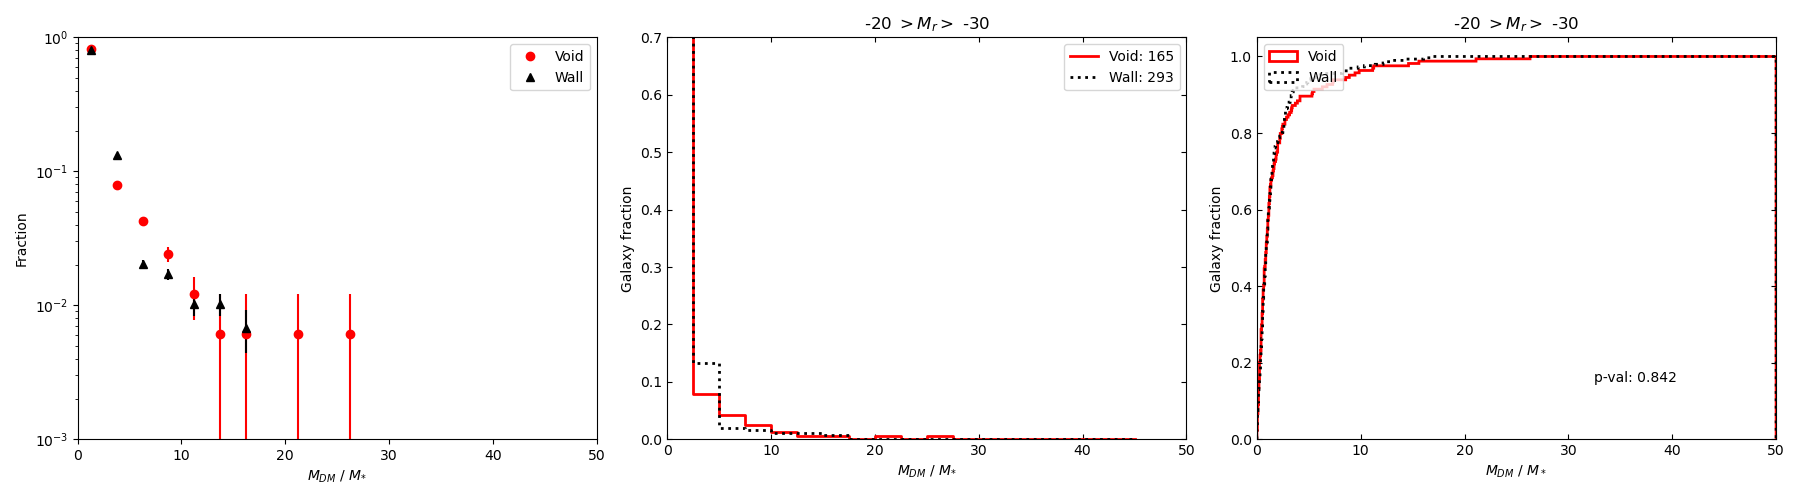

In [17]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -20, -30, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -20, -30, bins, hist_range)

### Galaxies between -20 and -21 in $M_r$

There are 140 void galaxies and 217 wall galaxies in this sample.
The average ratio for voids is 1.995310485583741 pm 11.476050889700408 and for walls is 0.8577608941452212 pm 2617836.0811837977
The average difference between the two populations is 1.1375495914385199 pm 2617836.0812089522
The median ratio for voids is 0.5168026517990802 and for walls is 0.49073389330924827
The median difference between the two populations is 0.026068758489831978


<IPython.core.display.Javascript object>


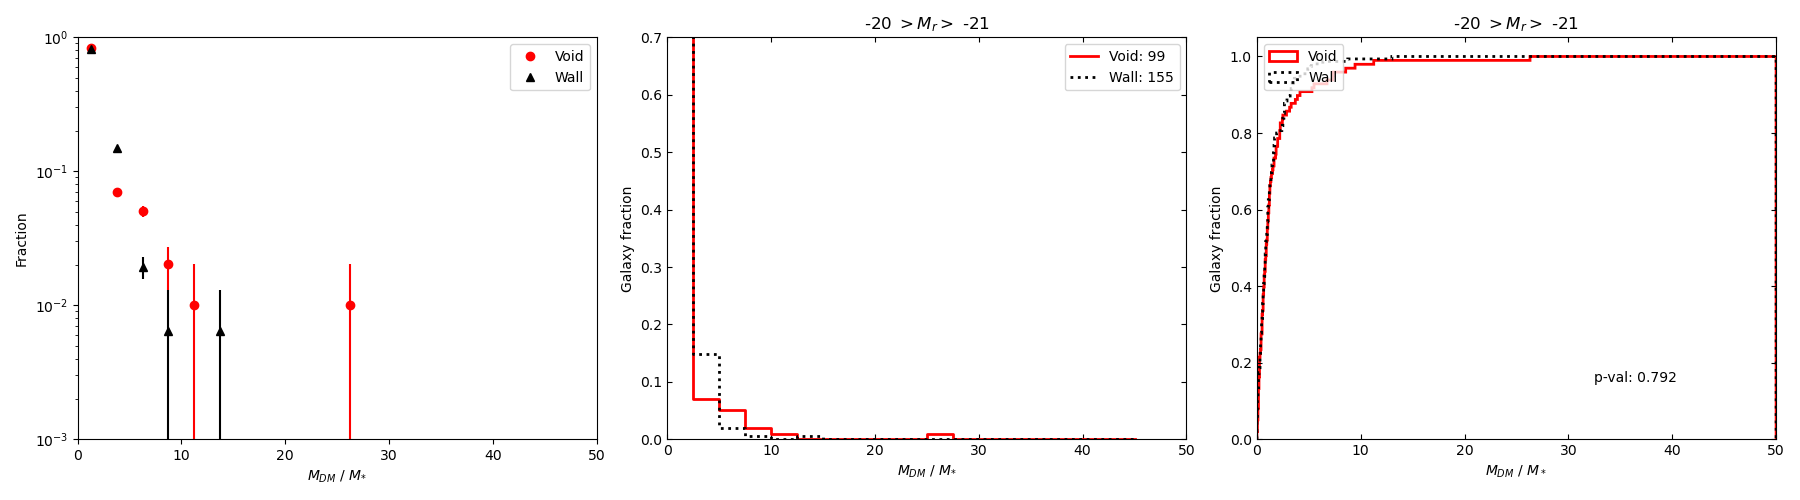

In [18]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -20, -21, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -20, -21, bins, hist_range)

### Galaxies with $M_r < -21$

There are 88 void galaxies and 184 wall galaxies in this sample.
The average ratio for voids is 1.6716872259834714 pm 2282775.5656799185 and for walls is 1.4630680374199259 pm 17262343.111589003
The average difference between the two populations is 0.20861918856354555 pm 17412626.280532457
The median ratio for voids is 0.5165816375490185 and for walls is 0.6212227070558564
The median difference between the two populations is -0.10464106950683782


<IPython.core.display.Javascript object>


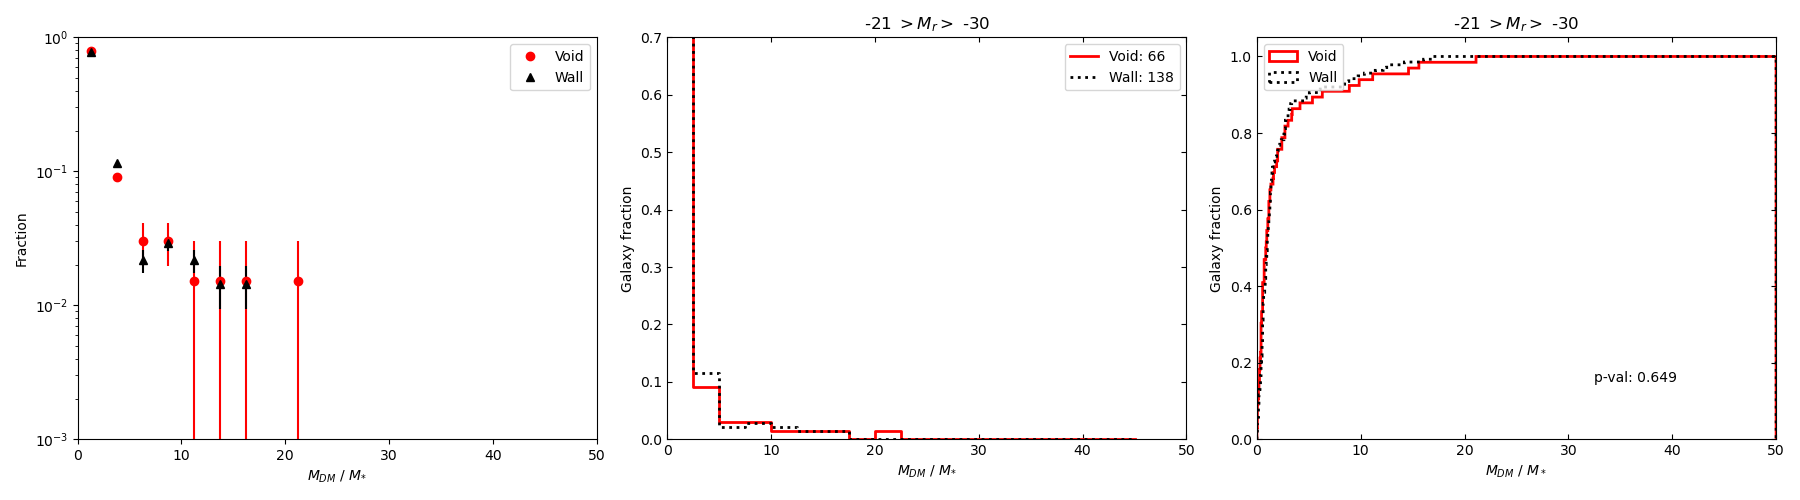

In [19]:
%matplotlib notebook

#print('Wrong mass ratios')
#mag_bin_results(wrong_count_table, wrong_void_table, wrong_wall_table,
#                -21, -30, OLD_bins, OLD_hist_range)

#print('\nCorrect mass ratios')
mag_bin_results(count_table, void_table, wall_table, -21, -30, bins, hist_range)

## Mass ratio v. $M_r$

In [5]:
from statsmodels.nonparametric.smoothers_lowess import lowess

### Local linear regression of data

In [18]:
void_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['rabsmag'], frac=0.25)
wall_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


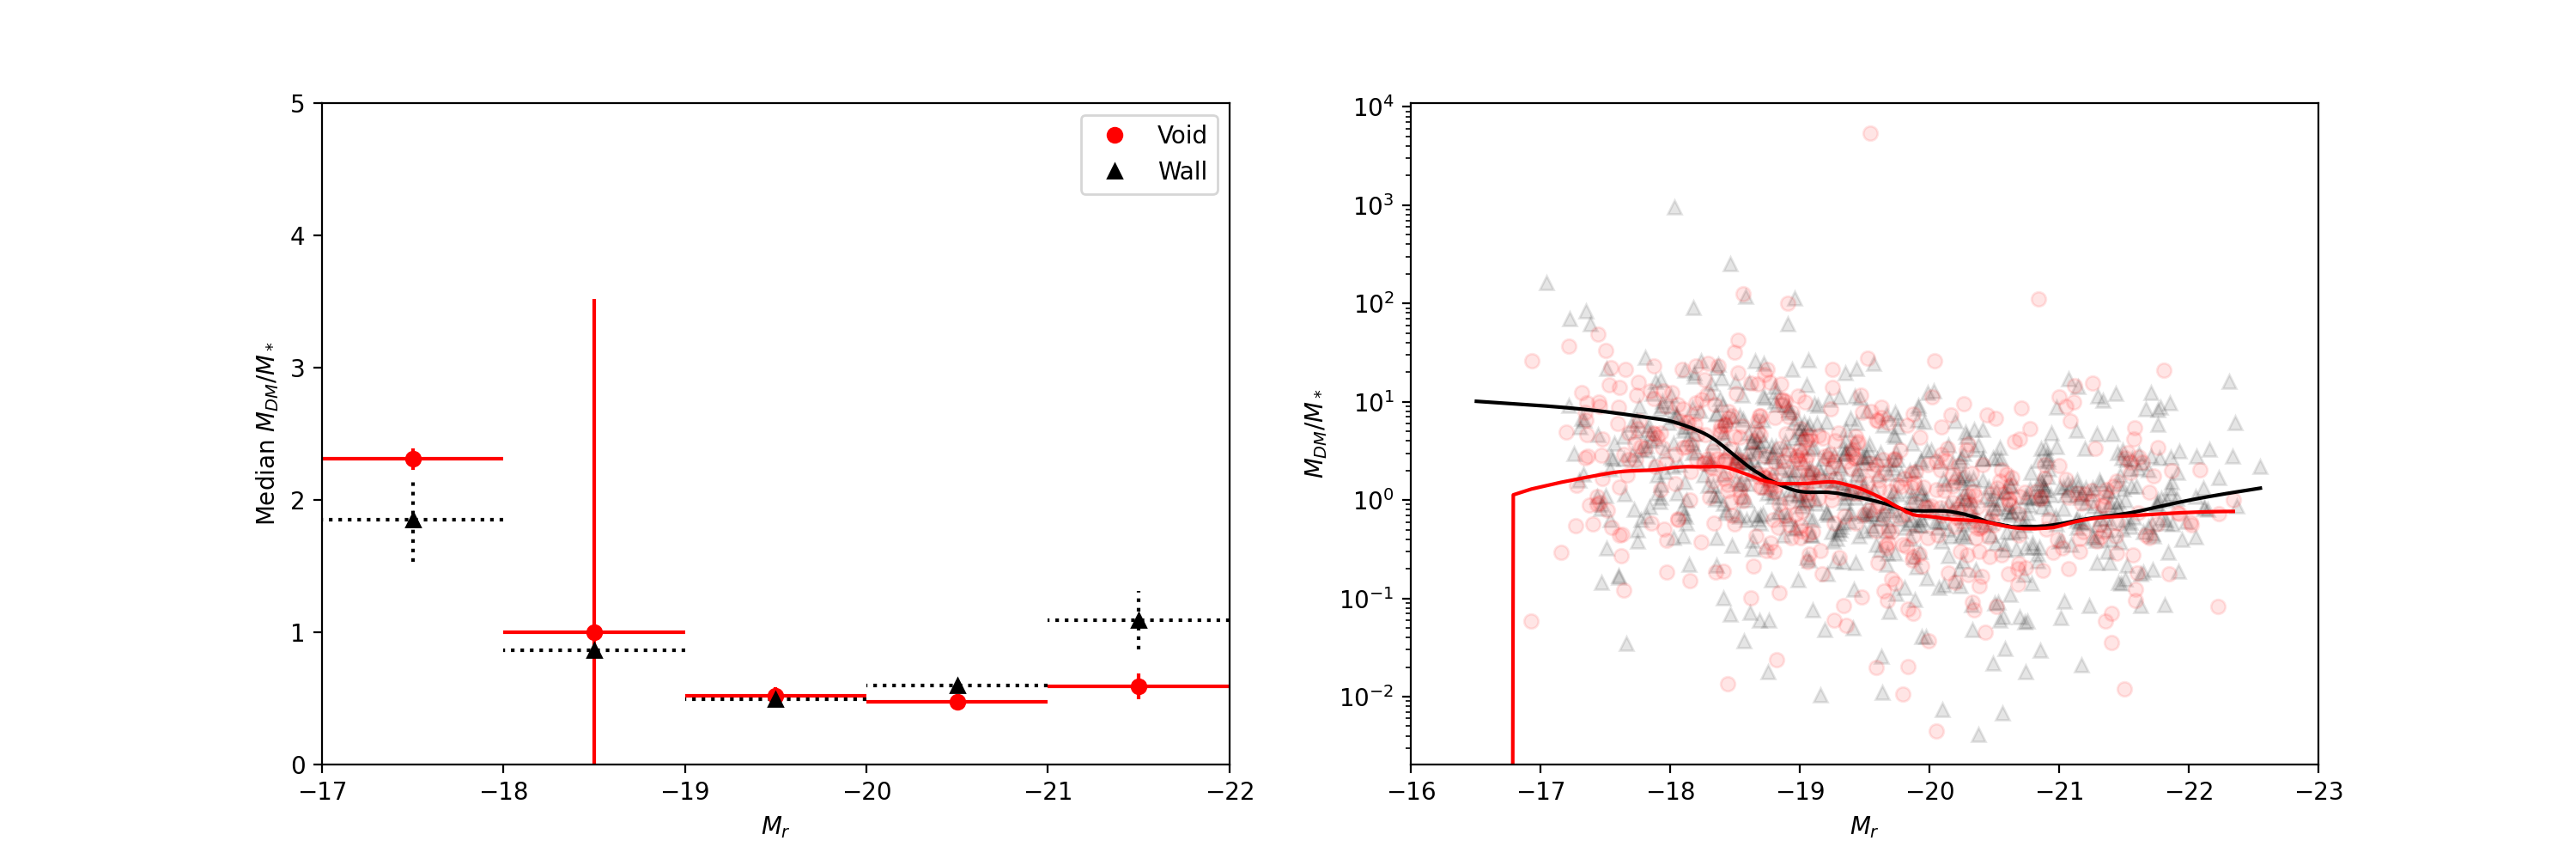

In [20]:
%matplotlib notebook

plt.figure(figsize=(15,5))

plt.subplot(121)

median_hist(void_table, wall_table, 'rabsmag', 'Mdark_Mstar_ratio', 
            np.array([-22, -21, -20, -19, -18]))

plt.xlim(-17,-22)
plt.ylim(0,5)
'''
plt.semilogy(wrong_wall_table['rabsmag'], wrong_wall_table['Mdark_Mstar_ratio'],
             'k^', alpha=0.3)
plt.semilogy(wrong_void_table['rabsmag'], wrong_void_table['Mdark_Mstar_ratio'],
             'ro', alpha=0.3)
             
plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{DM}$/$M_*$')
'''


plt.subplot(122)

plt.semilogy(wall_table['rabsmag'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1)

plt.semilogy(wall_smooth[:,0], wall_smooth[:,1], 'k')
plt.semilogy(void_smooth[:,0], void_smooth[:,1], 'r')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{DM}$/$M_*$');

## Write histogram table to file

In [ ]:
count_table.write('histogram_counts.txt', format='ascii.commented_header')

## Statistics

In [ ]:
g20_void_table.sort('Mdark_Mstar_ratio')
g20_wall_table.sort('Mdark_Mstar_ratio')

print(sum(g20_void_table['Mdark_Mstar_ratio'] > 1E4))
print(sum(g20_wall_table['Mdark_Mstar_ratio'] > 1E4))

In [ ]:
g19_20_void_table.sort('Mdark_Mstar_ratio')
g19_20_wall_table.sort('Mdark_Mstar_ratio')

print(g19_20_void_table[g19_20_void_table['Mdark_Mstar_ratio'] > 1E4])
print(g19_20_wall_table[g19_20_wall_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
g18_19_void_table.sort('Mdark_Mstar_ratio')
g18_19_wall_table.sort('Mdark_Mstar_ratio')

#print(sum(g18_19_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(g18_19_wall_table['Mdark_Mstar_ratio'] > 1E4))
print(g18_19_void_table[g18_19_void_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
#print(sum(g17_18_void_table['Mdark_Mstar_ratio'] > 1E6))
#print(sum(g17_18_wall_table['Mdark_Mstar_ratio'] > 1E6))
g17_18_void_table[g17_18_void_table['Mdark_Mstar_ratio'] > 1E4].pprint()
g17_18_wall_table[g17_18_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()

In [ ]:
#print(sum(dwarf_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(dwarf_wall_table['Mdark_Mstar_ratio'] > 1E6))
dwarf_wall_table[dwarf_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()

# Check data file sent to Regina

*3/26/20* - Regina is getting very different sample sizes than I am in this analysis.  I want to check the data file that I sent her to make sure that I did not mess anything up when translating from words to wordless.

In [6]:
Regina_table = Table.read('../spirals/Pipe3D-master_file_vflag_10_smooth2-27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

#### Remove bad galaxies

In [20]:
Regina_bad_boolean = Regina_table['curve_used'] == -99

Regina_good_galaxies = Regina_table[np.logical_not(Regina_bad_boolean)]
Regina_bad_galaxies = Regina_table[Regina_bad_boolean]

In [13]:
print(len(Regina_good_galaxies))
print(len(good_galaxies))

2426
2426


#### Split into void and wall

In [17]:
Regina_vboolean = Regina_good_galaxies['vflag'] == 1
Regina_wboolean = Regina_good_galaxies['vflag'] == 0

Regina_void_table = Regina_good_galaxies[Regina_vboolean]
Regina_wall_table = Regina_good_galaxies[Regina_wboolean]

In [18]:
print(len(Regina_void_table))
print(len(void_table))
print(len(wrong_void_table))

642
642
641


In [19]:
print(len(Regina_wall_table))
print(len(wall_table))
print(len(wrong_wall_table))

938
938
937


## Confirm bad galaxy classification

Bad galaxies (those removed from the final analysis) have either
- $\chi_\nu^2 \geq 10$ for all three curves
- $\chi_\nu^2 = -1$ (failed fit)
- `smoothness_score` $\geq 2.27$

In [33]:
avg_chi2_boolean = np.logical_and(Regina_bad_galaxies['avg_chi_square_ndf'] < 10,
                                  Regina_bad_galaxies['avg_chi_square_ndf'] != -1)
neg_chi2_boolean = np.logical_and(Regina_bad_galaxies['neg_chi_square_ndf'] < 10,
                                  Regina_bad_galaxies['neg_chi_square_ndf'] != -1)
pos_chi2_boolean = np.logical_and(Regina_bad_galaxies['pos_chi_square_ndf'] < 10,
                                  Regina_bad_galaxies['pos_chi_square_ndf'] != -1)

good_chi2_boolean = np.logical_or.reduce((avg_chi2_boolean, neg_chi2_boolean, pos_chi2_boolean))

smooth_boolean = Regina_bad_galaxies['smoothness_score'] < 2.27

good_bool = np.logical_and(good_chi2_boolean, smooth_boolean)

In [34]:
sum(good_bool)

129

In [35]:
Regina_bad_galaxies[good_bool]

MaNGA_plate,MaNGA_fiberID,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,smoothness_score
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64
7957,12701,2971,86,54590,578224,256.874090350008,35.92429082782633,0.7849412560462952,166.47567749023438,0.036522094160318375,2877518592.0,2.0,358.13367973594353,61.93414436557276,281.7204847977807,1140727605565.5085,312.3692064459449,379.64191142284386,15.3996456601205,30.06325693228526,30620848973.703785,9.530756172965233,720.9102814737753,4869744830.06728,190.10060146577086,307501332209.41486,1176.2786607286253,0.8205515146255493,0.0389567187889211,124519249781.31613,10101900450.815908,88623149641.83398,10101900450.815908,35896100139.48214,2.468879608020631,0.2814205557585021,-18.474050521850586,1.0644799726151855,0.31524725215861027,0.57335038394231,6443341.986540222,1.599910320725156,10807385.19073632,-99.0,-99.0,1.0,-99,3,312.3692064459449,9.530756172965233,1176.2786607286253,585073,-99.0,1.605946570634842,0.37164404223227754,1.8245428252895464
8144,6101,4456,918,55537,161305,115.07588607476485,28.4640826623513,0.9266507029533386,42.31805419921875,0.022251632064580917,6455005696.0,2.0,198.23642799272184,6.879049482831848,3.471405232326837,0.9743977673019435,36.82988915583162,230.3953136741364,8.774901131637195,3.560837454752523,1.3017968286603292,113.61439017494165,164.48302699543845,3.0749636156639255,4.321979422646738,0.9993635595600985,54.637641024567166,0.14202477037906647,0.00185081631298117,118201576690.47421,8203482537.175947,95295723897.47646,8203482537.175947,22905852792.997753,4.160322025932519,0.3581391451045964,-19.9429988861084,6.0140962062472845,0.2862728512009883,6.662670411189063,0.4206165274854939,5.475735907002061,0.20140122634545504,-99.0,-99.0,-99.0,-99,0,5.261412736547375,16.230627167848805,7.805377289223881,-1,-99.0,1.7870494723320007,0.02669149596523898,1.0963580851652184
8623,12701,982,408,52466,189010,311.40173021191566,0.5104938608721169,0.6160288453102112,5.236358642578125,0.01348657812923193,3263599104.0,-9.0,194.16646732096572,0.0,0.010000000000000009,0.0,794.6087474921594,73.489829187502,38397100076.409706,51.449217922853116,31437747202.42142,55.54882959428006,353.9581965338694,0.0,0.010000000694132538,0.0,4070.990399116574,0.009304280392825603,0.000476056429191323,10830372798.793089,1.131734589174432e+19,10568174204.982317,1.131734589174432e+19,262198593.81077215,40.305991162596904,43163259296.16545,-16.211252212524414,14.078057774299022,0.0,10.006277802902291,5228098537.138521,14.078057773430096,0.0,-99.0,-99.0,-99.0,-99,2,132.43479124869324,9.258138265713344,678.4983998527623,-1,-99.0,1.4995184540748596,0.5163909774436091,1.863960987299829
9678,12701,0,0,0,641576,11.07240346486114,42.95079957566875,0.8705443739891052,83.36285400390625,0.11714121699333191,16896002048.0,-9.0,42.271376182966435,6.787227769878499,124.98815682142592,664538439.9419769,32.99415803305224,173.74403942535486,1320.239949662013,0.5316522110985631,4.300967096835352,349.03977419309297,19.733026190008776,2.0599619

In [36]:
avg_chi2_boolean = np.logical_and(wrong_bad_galaxies['avg_chi_square_ndf'] < 10,
                                  wrong_bad_galaxies['avg_chi_square_ndf'] != -1)
neg_chi2_boolean = np.logical_and(wrong_bad_galaxies['neg_chi_square_ndf'] < 10,
                                  wrong_bad_galaxies['neg_chi_square_ndf'] != -1)
pos_chi2_boolean = np.logical_and(wrong_bad_galaxies['pos_chi_square_ndf'] < 10,
                                  wrong_bad_galaxies['pos_chi_square_ndf'] != -1)

good_chi2_boolean = np.logical_or.reduce((avg_chi2_boolean, neg_chi2_boolean, pos_chi2_boolean))

smooth_boolean = wrong_bad_galaxies['smoothness_score'] < 2.27

good_bool = np.logical_and(good_chi2_boolean, smooth_boolean)

In [37]:
sum(good_bool)

127

<IPython.core.display.Javascript object>


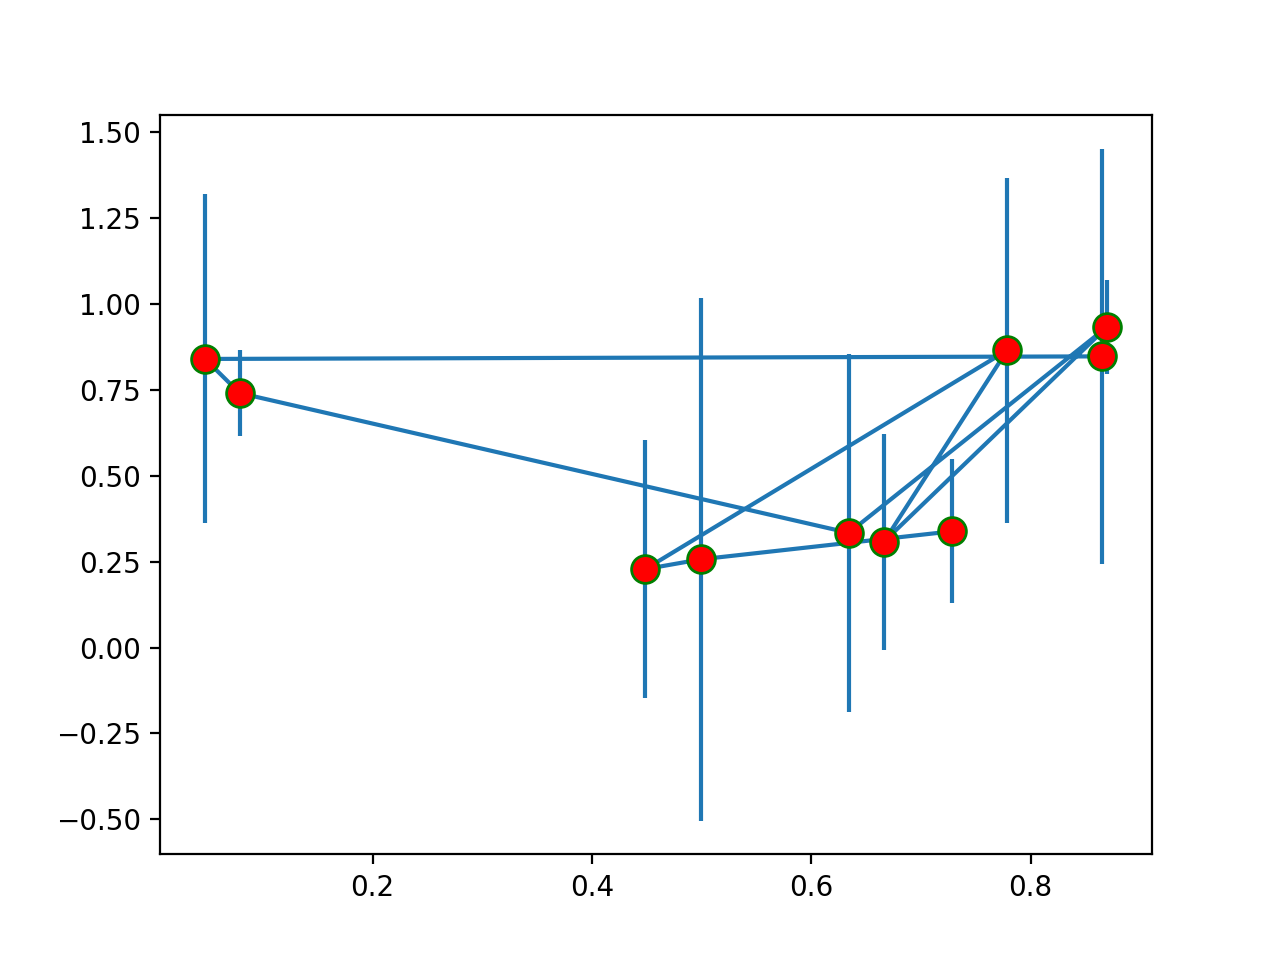

<ErrorbarContainer object of 3 artists>

In [14]:
%matplotlib notebook

x,y,yerr = np.random.rand(3,10)
plt.errorbar(x, y, yerr, marker='o', mfc='red',
         mec='green', ms=10)#, mew=2)